<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/Forecasting_cocacola_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: >

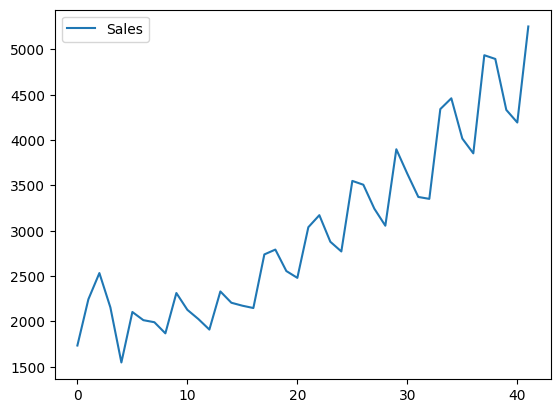

In [ ]:
data.plot()

<Axes: >

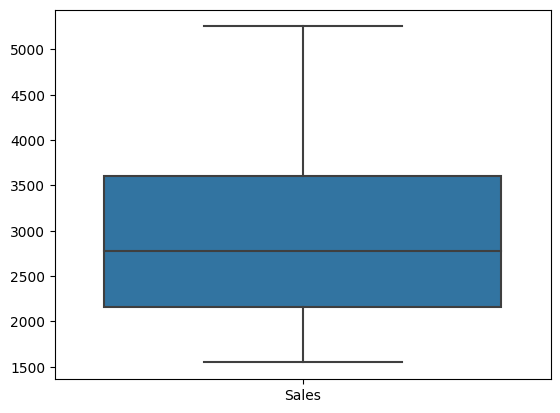

In [ ]:
import seaborn as  sns
sns.boxplot(data =data)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

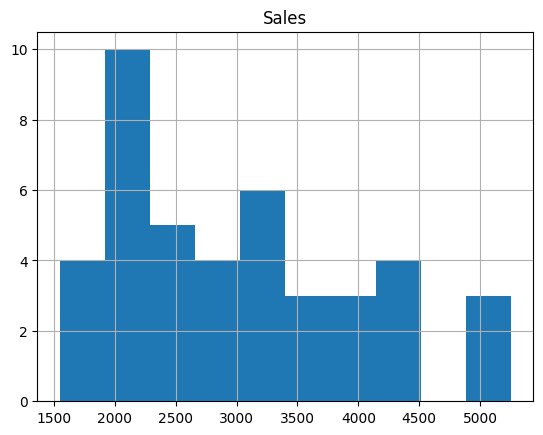

In [ ]:
data.hist()

In [ ]:
np.array(data["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

<ipython-input-11-e28091dc1110>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(data['Sales'],kde=True)


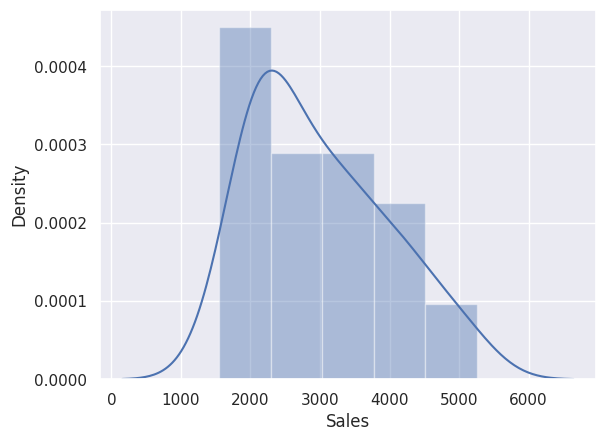

In [ ]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(data['Sales'],kde=True)

In [ ]:
##data preproseccing

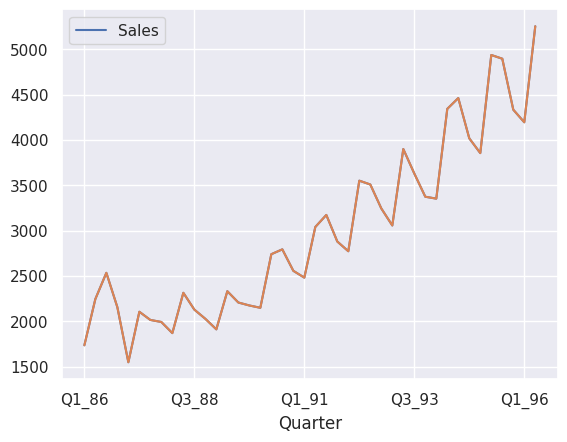

In [ ]:
##line plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)
data.plot()
plt.plot(data)

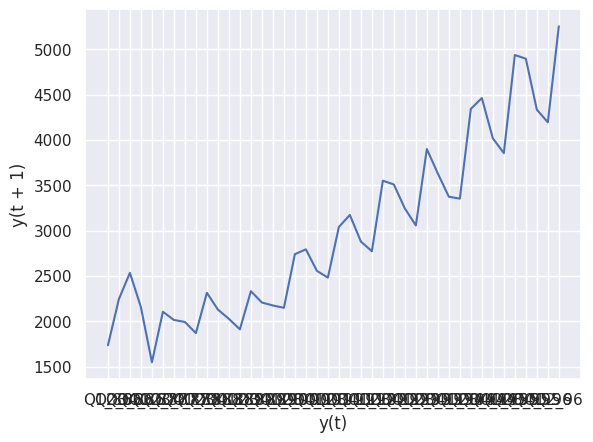

In [ ]:
##lag plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import lag_plot
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)

lag_plot(data)
plt.plot(data)

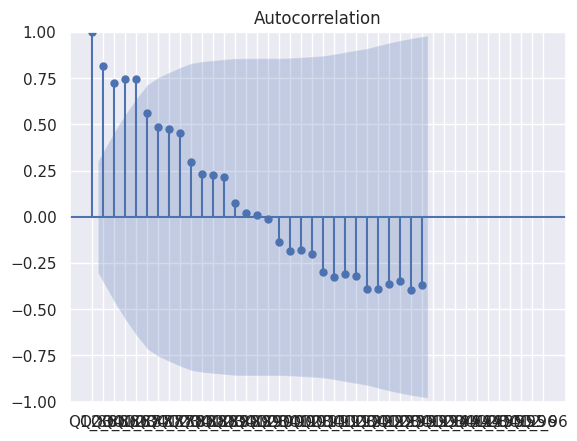

In [ ]:
##autocorrelation plot
from pandas import read_csv
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0,parse_dates=True)

plot_acf(data,lags=30)
plt.plot(data)

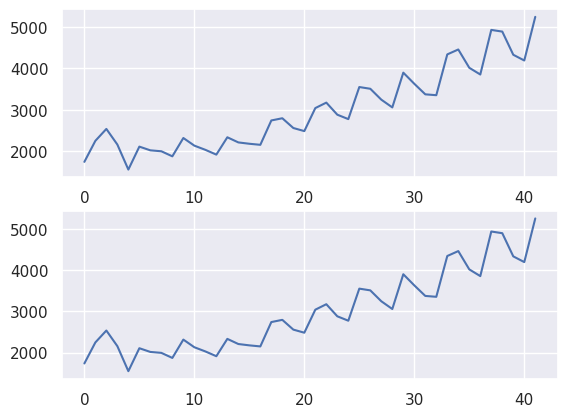

In [ ]:
##square root transformation
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pylab as plt
%matplotlib inline
dataframe=DataFrame(data.values)
dataframe.columns=['Sales']
##line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
#histogram
plt.subplot(212)
plt.plot(dataframe['Sales'])
plt.show()

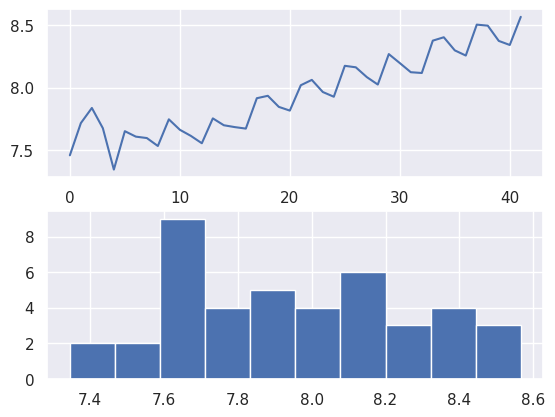

In [ ]:
##log transformation
from numpy import log
dataframe=DataFrame(data.values)
dataframe.columns=['Sales']
dataframe['Sales']=log(dataframe['Sales'])
##line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
#histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

In [ ]:
##forecasting base model
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
data = pd.read_excel("//content/CocaCola_Sales_Rawdata.xlsx")
data.Sales.plot

In [ ]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


AttributeError: ignored

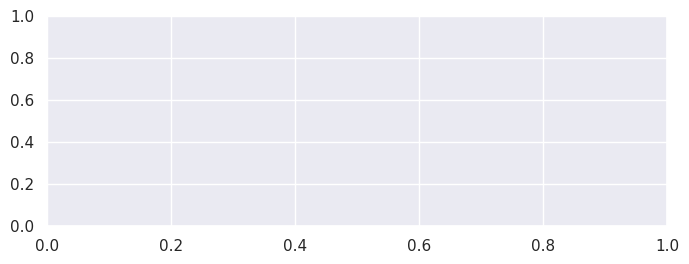

In [ ]:
from pandas.core.arrays import period
from pandas.core.series import Frequency
import seaborn as sns
##box plot forever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Sales",y="Quarter",data="data")
plt.figure(figsize=(12,3))
sns.lineplot(x='Sales',y='Quarter',data='data')
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add=seasonal_decompose(data.passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [ ]:
data['quarter'] = 0
for i in range(42):
    p=data['Quarter'][i]
    data['quarter'][i]=p[0:2]
data

<ipython-input-29-4aef5cb93bf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quarter'][i]=p[0:2]


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [ ]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [ ]:
df_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,df_dummies],axis= 1)

In [ ]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [ ]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(data['Sales'])
cc.head()


,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [ ]:
train =cc.head(32)
test =cc.tail(10)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear Model
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767116

In [ ]:
#Quadratic Model
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.735735540752

In [ ]:
# Exponential model
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [ ]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1850.466546185835

In [ ]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

673.4432892659145

In [ ]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

277.35107711285275

<Axes: >

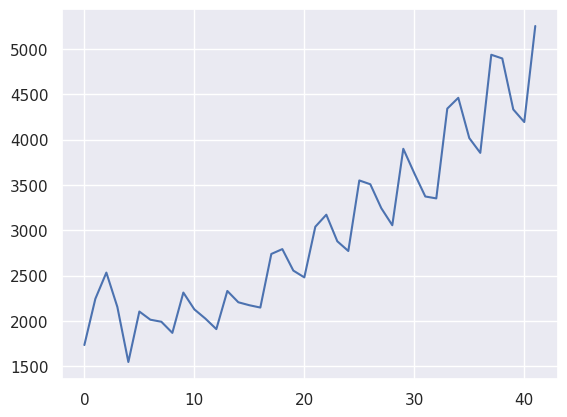

In [ ]:
data.Sales.plot(label="org")


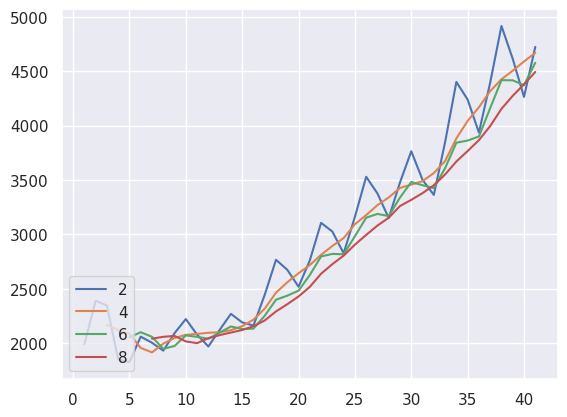

In [ ]:
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

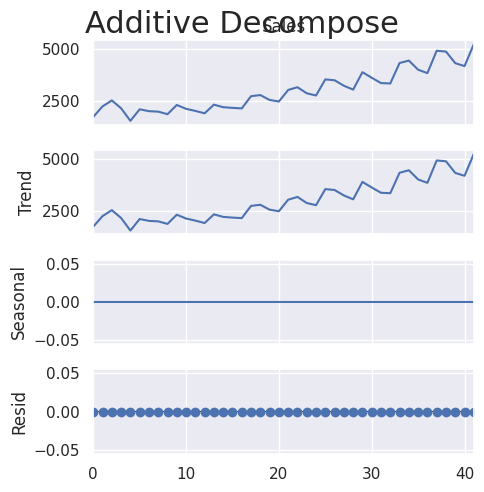

In [ ]:
result_add = seasonal_decompose(x=data['Sales'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
##Arima model

In [ ]:
# To install the library
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [ ]:

  # Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  stepwise_fit = auto_arima(data['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=407.084, Time=0.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.443, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.28 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=404.445, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=405.084, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=403.610, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 3.430 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -200.223
Date:                            Fri, 15 Sep 2023   AIC                            402.446
Time:                                    13:48:36   BIC                            403.813
Sample:                                         0   HQIC                           402.874
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.813e+04   1.67e+04      3.472      0.001    2.53e+04    9.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Split data into train / test sets
train = data.iloc[:len(data)-12]
test = data.iloc[len(data)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Sales'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   30
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -117.493
Date:                            Fri, 15 Sep 2023   AIC                            244.986
Time:                                    13:49:22   BIC                            249.152
Sample:                                         0   HQIC                           245.400
                                             - 30                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0877      0.270      0.325      0.745      -0.441       0.617
ar.S.L12       0.5481      7.516      0.073      0.942     -14.183      15.279
ar.S.L24       0.4497      7.307      0.062      0.951     -13.872      14.772
ma.S.L12      -1.0000      5.257     -0.190      0.849     -11.303       9.303
sigma2      5.176e+04      0.000   4.54e+08      0.000    5.18e+04    5.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.72   Prob(JB):                         0.84
Heteroskedasticity (H):               0.41   Skew:                             0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+26. Standard errors may be unstable.
"""

<Axes: >

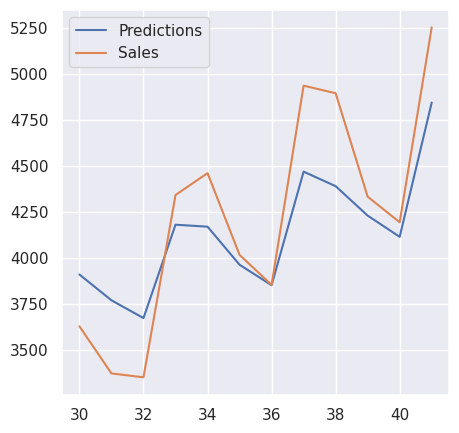

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)

In [ ]:

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Sales"], predictions)

# Calculate mean squared error
mean_squared_error(test["Sales"], predictions)

92547.82367954876

<Axes: >

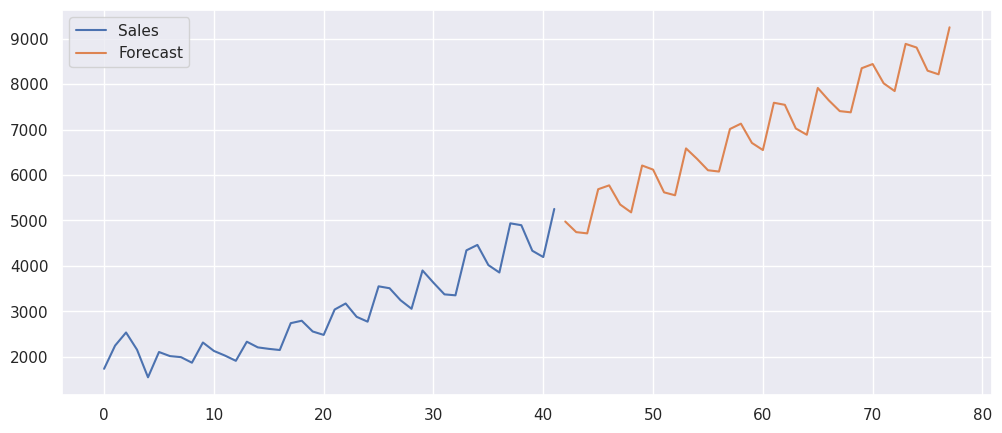

In [ ]:

# Train the model on the full dataset
model = model = SARIMAX(data['Sales'],
                        order = (0, 1, 1),
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(data),
                          end = (len(data)-1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
data['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)